In [1]:
import numpy as np

# Number of arms
num_arms = 10

# Initialize reward means for each arm
reward_means = np.zeros(num_arms)

print("Initial reward means:", reward_means)

Initial reward means: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [2]:
def update_reward_means(reward_means, step_std=0.01):
    """Updates the reward means with a random walk."""
    random_walks = np.random.normal(0, step_std, size=num_arms)
    reward_means += random_walks
    return reward_means

# Let's test the function:
reward_means = update_reward_means(reward_means)
print("Updated reward means after one random walk:", reward_means)


Updated reward means after one random walk: [ 0.01092793 -0.00376485 -0.00774421 -0.00711595 -0.01514789  0.01489683
  0.00288875  0.00981686 -0.00856247 -0.00447853]


In [3]:
# Initialize estimated Q-values for each arm
Q_values = np.zeros(num_arms)

print("Initial Q-values:", Q_values)

Initial Q-values: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [28]:
def select_action(Q_values, epsilon):
    """ε-greedy action selection."""
    if np.random.random() < epsilon:  # Explore
        return np.random.choice(num_arms)
    else:  # Exploit
        return np.argmax(Q_values)

def update_Q_values(Q_values, arm_selected, reward, alpha=0.3):
    """Simple sample average update rule."""
    Q_values[arm_selected] += alpha * (reward - Q_values[arm_selected])
    return Q_values

In [35]:
def run_single_experiment(Q_values, reward_means, epsilon, num_steps=1000):
    rewards_received = []

    for _ in range(num_steps):
        # Select action
        arm_selected = select_action(Q_values, epsilon)

        # Get reward from environment
        reward = np.random.normal(reward_means[arm_selected], .1)

        # Update Q-values
        Q_values = update_Q_values(Q_values, arm_selected, reward)

        # Update environment's reward means (random walk)
        reward_means = update_reward_means(reward_means)

        # Store reward
        rewards_received.append(reward)

    return rewards_received

In [36]:
from tqdm import tqdm

def run_multiple_experiments(num_runs=2000, epsilon_values=[0.1, 0.01, 0], num_steps=1000):
    """Runs the experiment multiple times for each epsilon value."""
    all_avg_rewards = {}

    for epsilon in epsilon_values:
        all_rewards = []
        for _ in tqdm(range(num_runs), desc=f"Running for ε = {epsilon}"):  # Wrapping loop in tqdm
            Q_values = np.zeros(num_arms)  # Reset Q-values
            reward_means = np.zeros(num_arms)  # Reset reward means

            rewards_received = run_single_experiment(Q_values, reward_means, epsilon, num_steps)
            all_rewards.append(rewards_received)

        avg_rewards = np.mean(all_rewards, axis=0)  # Averaging rewards over runs for each timestep
        all_avg_rewards[epsilon] = avg_rewards

    return all_avg_rewards


In [37]:
import matplotlib.pyplot as plt

def plot_results(all_avg_rewards):
    """Plots average rewards against timesteps for each epsilon value."""
    plt.figure(figsize=(10, 6))

    for epsilon, avg_rewards in all_avg_rewards.items():
        plt.plot(avg_rewards, label=f'ε = {epsilon}')

    plt.xlabel('Timesteps')
    plt.ylabel('Average Reward')
    plt.title('ε-greedy Strategies over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

Running for ε = 0: 100%|██████████| 1000/1000 [00:09<00:00, 105.88it/s]


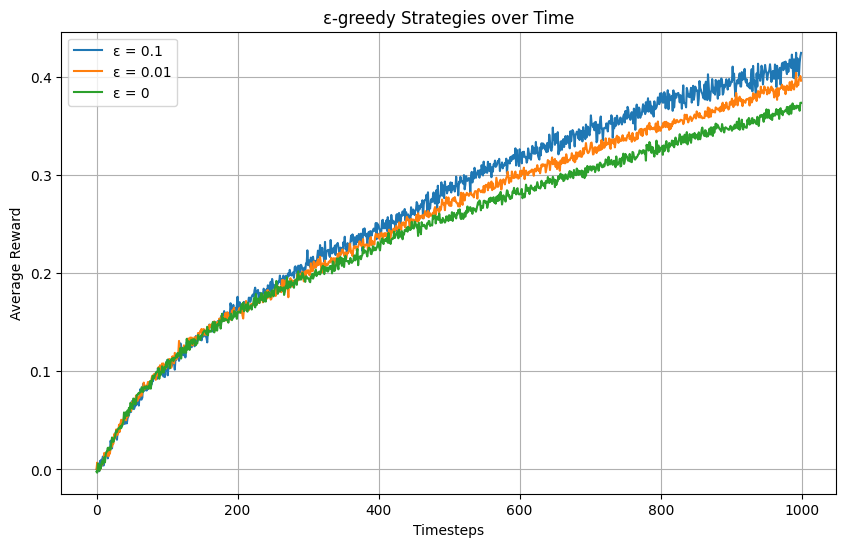

In [38]:
all_avg_rewards = run_multiple_experiments(num_runs=1000,epsilon_values=[0.1, 0.01, 0])
plot_results(all_avg_rewards)

#with real sample average

In [39]:
def run_single_experiment(Q_values, reward_means, epsilon, num_steps):
    """Runs a single ε-greedy experiment."""
    rewards_received = []
    arm_counts = np.zeros(num_arms)  # Count of times each arm is selected

    for _ in range(num_steps):
        reward_means = update_reward_means(reward_means)

        if np.random.random() < epsilon:
            chosen_arm = np.random.randint(num_arms)
        else:
            chosen_arm = np.argmax(Q_values)

        reward = np.random.normal(reward_means[chosen_arm], .03)  # std=0
        rewards_received.append(reward)

        arm_counts[chosen_arm] += 1
        alpha = 1 / arm_counts[chosen_arm]
        Q_values[chosen_arm] += alpha * (reward - Q_values[chosen_arm])  # Sample average update

    return rewards_received


In [40]:
from tqdm import tqdm

def run_multiple_experiments(num_runs=2000, epsilon_values=[0.1, 0.01, 0], num_steps=1000):
    """Runs the experiment multiple times for each epsilon value."""
    all_avg_rewards = {}

    for epsilon in epsilon_values:
        all_rewards = []
        for _ in tqdm(range(num_runs), desc=f"Running for ε = {epsilon}"):  # Wrapping loop in tqdm
            Q_values = np.zeros(num_arms)  # Reset Q-values
            reward_means = np.zeros(num_arms)  # Reset reward means

            rewards_received = run_single_experiment(Q_values, reward_means, epsilon, num_steps)
            all_rewards.append(rewards_received)

        avg_rewards = np.mean(all_rewards, axis=0)  # Averaging rewards over runs for each timestep
        all_avg_rewards[epsilon] = avg_rewards

    return all_avg_rewards


Running for ε = 0: 100%|██████████| 1000/1000 [00:10<00:00, 98.03it/s]


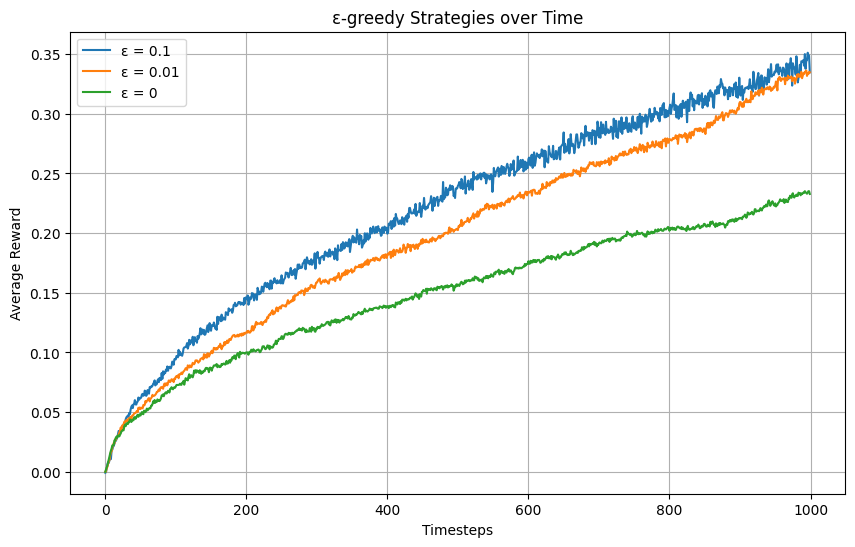

In [41]:
all_avg_rewards = run_multiple_experiments(num_runs=1000,epsilon_values=[0.1, 0.01, 0])
plot_results(all_avg_rewards)